# Gradient Boost Machine For Paddy

In [37]:
import pandas as pd
import numpy as np  
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits

In [21]:
df = pd.read_csv("datasetsPKM.csv")
df

,Area_K,Area_S,Area_H,RedIndex_K,GreenIndex_K,RGR_S,VARI_S,MTS
0,"1,41","0,33","5,25","0,08","0,89","1,05","-0,03",5
1,"9,21","2,59","12,1","0,38","0,45","0,87","0,08",1
2,"3,58","1,09","1,37","0,4","0,44","0,99","0,01",1
3,"9,64","0,59","2,82","0,38","0,45","1,03","-0,02",5
4,"26,6","3,13","10,3","0,37","0,47","1,06","-0,04",1
...,...,...,...,...,...,...,...,...
143,"23,1","3,78","8,95","0,36","0,45","0,96","0,02",5
144,"16,9","17,2","30,9","0,37","0,46","0,94","0,04",1
145,"10,1","4,35","8,75","0,36","0,46","0,94","0,04",3
146,"0,64","2,54","10,6","0,38","0,46","0,89","0,07",3


In [22]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Area_K        148 non-null    str  
 1   Area_S        148 non-null    str  
 2   Area_H        148 non-null    str  
 3   RedIndex_K    148 non-null    str  
 4   GreenIndex_K  148 non-null    str  
 5   RGR_S         148 non-null    str  
 6   VARI_S        148 non-null    str  
 7   MTS           148 non-null    int64
dtypes: int64(1), str(7)
memory usage: 9.4 KB


In [26]:
cols = df.select_dtypes(include="object").columns
df[cols] = df[cols].replace(",", ".", regex=True).astype(float)


/var/folders/j6/k82_mc292vq_vpp9f821cv980000gn/T/ipykernel_2653/3057480239.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cols = df.select_dtypes(include="object").columns


In [27]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area_K        148 non-null    float64
 1   Area_S        148 non-null    float64
 2   Area_H        148 non-null    float64
 3   RedIndex_K    148 non-null    float64
 4   GreenIndex_K  148 non-null    float64
 5   RGR_S         148 non-null    float64
 6   VARI_S        148 non-null    float64
 7   MTS           148 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 9.4 KB


In [28]:
df.describe()

,Area_K,Area_S,Area_H,RedIndex_K,GreenIndex_K,RGR_S,VARI_S,MTS
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,12.629257,9.840338,17.534324,0.371622,0.460203,0.915878,0.054662,1.783784
std,10.382281,7.260507,13.119642,0.025848,0.038747,0.052914,0.034254,1.203965
min,0.640000,0.330000,0.830000,0.080000,0.390000,0.770000,-0.110000,1.000000
25%,4.430000,3.527500,7.352500,0.370000,0.450000,0.880000,0.040000,1.000000
50%,10.250000,8.090000,14.850000,0.370000,0.460000,0.910000,0.060000,1.000000
75%,18.775000,15.025000,24.600000,0.380000,0.470000,0.942500,0.080000,3.000000
max,50.800000,31.000000,62.800000,0.400000,0.890000,1.190000,0.160000,5.000000


In [29]:
df.isnull().sum()

Area_K          0
Area_S          0
Area_H          0
RedIndex_K      0
GreenIndex_K    0
RGR_S           0
VARI_S          0
MTS             0
dtype: int64

In [35]:
cols = df.columns.tolist()
cols

['Area_K',
 'Area_S',
 'Area_H',
 'RedIndex_K',
 'GreenIndex_K',
 'RGR_S',
 'VARI_S',
 'MTS']

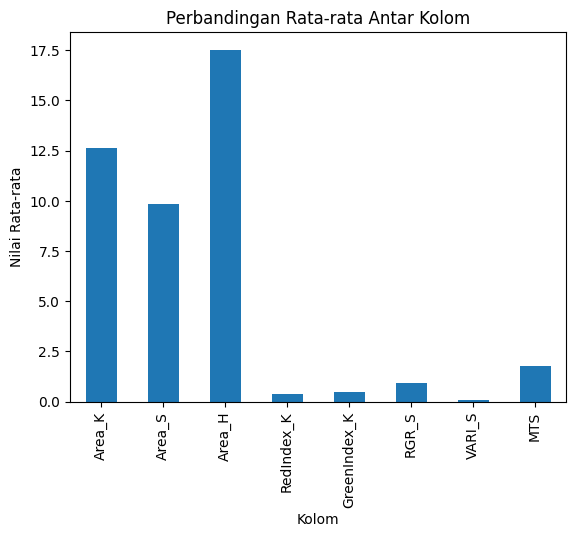

In [36]:
import matplotlib.pyplot as plt

df[cols].mean().plot(kind="bar")

plt.title("Perbandingan Rata-rata Antar Kolom")
plt.ylabel("Nilai Rata-rata")
plt.xlabel("Kolom")

plt.show()


In [40]:
X = df.drop("MTS", axis=1)
y = df["MTS"]

In [41]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)  

In [43]:
X_scaled

array([[0.01535088, 0.        , 0.07132483, ..., 1.        , 0.66666667,
        0.2962963 ],
       [0.17085327, 0.07368764, 0.18186219, ..., 0.12      , 0.23809524,
        0.7037037 ],
       [0.05861244, 0.02477992, 0.00871389, ..., 0.1       , 0.52380952,
        0.44444444],
       ...,
       [0.18859649, 0.13107271, 0.12780378, ..., 0.14      , 0.4047619 ,
        0.55555556],
       [0.        , 0.07205739, 0.15765693, ..., 0.14      , 0.28571429,
        0.66666667],
       [0.06838118, 0.18421911, 0.20445377, ..., 0.16      , 0.26190476,
        0.7037037 ]], shape=(148, 7))

In [44]:
SEED = 42       

X, y = load_digits(return_X_y=True)

train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = SEED)

gbc = GradientBoostingClassifier(n_estimators=300,
                                 learning_rate=0.05,
                                 random_state=100,
                                 max_features=5 )
                                 
gbc.fit(train_X, train_y)

pred_y = gbc.predict(test_X)

acc = accuracy_score(test_y, pred_y)
print("Gradient Boosting Classifier accuracy is : {:.2f}".format(acc))

Gradient Boosting Classifier accuracy is : 0.98
